### **Libraries Importing**

In [4]:
#importing the necessary libraries
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import re
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### **Loading Dataset**

In [5]:
#Loading the dataset
train = pd.read_csv(
    "/kaggle/input/sentiment-analysis-dataset/train.csv",
    encoding="Windows-1252"
)

test = pd.read_csv(
    "/kaggle/input/sentiment-analysis-dataset/test.csv",
    encoding="Windows-1252"
)

### **Preparing Dataset**

In [6]:
#Combining the dataset and reading the fisrt 5 rows
df=pd.concat([train,test])
df.head()

,textID,text,selected_text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²)
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,morning,0-20,Afghanistan,38928346.0,652860.0,60.0
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,noon,21-30,Albania,2877797.0,27400.0,105.0
2,088c60f138,my boss is bullying me...,bullying me,negative,night,31-45,Algeria,43851044.0,2381740.0,18.0
3,9642c003ef,what interview! leave me alone,leave me alone,negative,morning,46-60,Andorra,77265.0,470.0,164.0
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,noon,60-70,Angola,32866272.0,1246700.0,26.0


In [7]:
#Dropping the unnecessary columns and reading the dataset
df=df[['text','sentiment']]
df.head()

,text,sentiment
0,"I`d have responded, if I were going",neutral
1,Sooo SAD I will miss you here in San Diego!!!,negative
2,my boss is bullying me...,negative
3,what interview! leave me alone,negative
4,"Sons of ****, why couldn`t they put them on t...",negative


In [8]:
#Checking the Data info
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32296 entries, 0 to 4814
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text       31014 non-null  object
 1   sentiment  31015 non-null  object
dtypes: object(2)
memory usage: 756.9+ KB


### **Cleaning Datasets and Processing text**

In [9]:
#Checking for null values
df.isna().sum()

text         1282
sentiment    1281
dtype: int64

In [10]:
#Dropping the null values
df.dropna(inplace=True)

In [11]:
#Checking the shape of the dataset
df.shape

(31014, 2)

### **Count Plot**

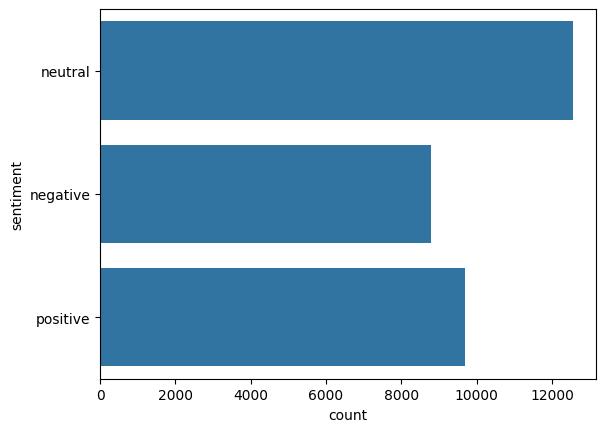

In [12]:
#Checking the dataset counts
sns.countplot(df['sentiment'])
plt.show()

### **Enhanced Text Preprocessing**

In [13]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import pad_sequences
from sklearn.preprocessing import LabelEncoder

In [35]:
# Enhanced Cleaning (Standardization)
def clean_text(text):
    text = text.lower() # Lowercase
    text = re.sub(r'[^a-zA-Z\s]', '', text) # Remove special characters and numbers
    return text

df['cleaned_text'] = df['text'].apply(clean_text)

In [36]:
# Text Vectorization using Keras
max_words = 10000
max_len = 50 # Standard length for all tweets
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(df['cleaned_text'])

### **Defining the Tagets**

In [37]:
# Convert text to sequences of integers
X = tokenizer.texts_to_sequences(df['cleaned_text'])
X = pad_sequences(X, maxlen=max_len) # Ensure every input has the same length

# Label Encoding (Preparing the 'sentiment' column)
le = LabelEncoder()
y = le.fit_transform(df['sentiment'])
y = tf.keras.utils.to_categorical(y) # Converts to [1,0,0], [0,1,0], etc.

In [38]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

### **Implementing the Models**

In [39]:
#Tracing some importing and checking the performance
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, SimpleRNN, GRU, Dense
from sklearn.metrics import confusion_matrix, classification_report

### **Training LSTM model**

In [40]:
# Building the LSTM Model
model_lstm = Sequential([
    Embedding(max_words, 128, input_length=max_len),
    LSTM(64, dropout=0.2, recurrent_dropout=0.2),
    Dense(3, activation='softmax')
])
# Compiling the LSTM Model
model_lstm.compile(optimizer='adam', 
                   loss='categorical_crossentropy', 
                   metrics=['accuracy'])

# Train the LSTM model and save the progress in 'history_lstm'
history_lstm = model_lstm.fit(X_train, 
                              y_train, 
                              epochs=10, 
                              batch_size=64, 
                              validation_split=0.1)

Epoch 1/10
349/349 ━━━━━━━━━━━━━━━━━━━━ 26s 61ms/step - accuracy: 0.5079 - loss: 0.9616 - val_accuracy: 0.7010 - val_loss: 0.7051
Epoch 2/10
349/349 ━━━━━━━━━━━━━━━━━━━━ 20s 58ms/step - accuracy: 0.7546 - loss: 0.6046 - val_accuracy: 0.7135 - val_loss: 0.6925
Epoch 3/10
349/349 ━━━━━━━━━━━━━━━━━━━━ 19s 55ms/step - accuracy: 0.8057 - loss: 0.5026 - val_accuracy: 0.6938 - val_loss: 0.7288
Epoch 4/10
349/349 ━━━━━━━━━━━━━━━━━━━━ 20s 56ms/step - accuracy: 0.8423 - loss: 0.4201 - val_accuracy: 0.7023 - val_loss: 0.7681
Epoch 5/10
349/349 ━━━━━━━━━━━━━━━━━━━━ 21s 59ms/step - accuracy: 0.8684 - loss: 0.3676 - val_accuracy: 0.6962 - val_loss: 0.8377
Epoch 6/10
349/349 ━━━━━━━━━━━━━━━━━━━━ 20s 56ms/step - accuracy: 0.8838 - loss: 0.3208 - val_accuracy: 0.6865 - val_loss: 0.9159
Epoch 7/10
349/349 ━━━━━━━━━━━━━━━━━━━━ 19s 56ms/step - accuracy: 0.8989 - loss: 0.2838 - val_accuracy: 0.6865 - val_loss: 0.9469
Epoch 8/10
349/349 ━━━━━━━━━━━━━━━━━━━━ 20s 57ms/step - accuracy: 0.9100 - loss: 0.2472 - 

### **LSTM Model Evaluation**

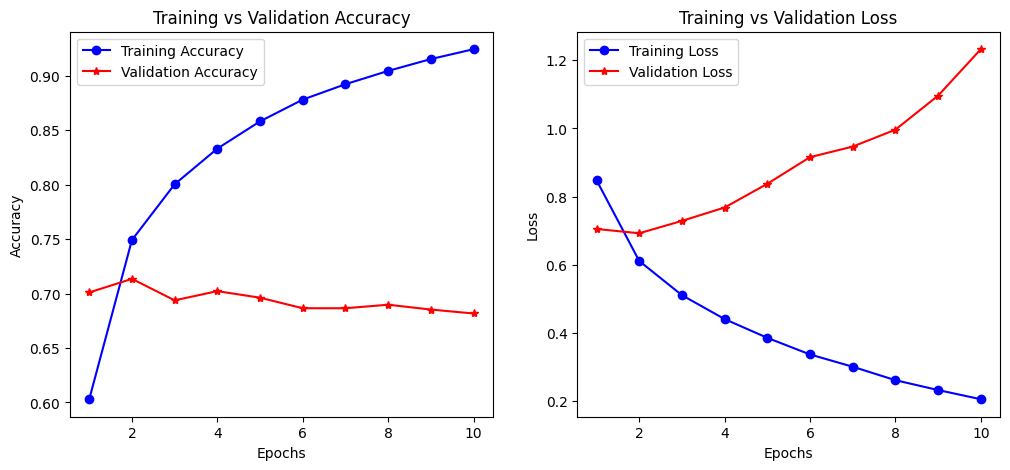

In [41]:
# Extract values from history
epochs = range(1, len(history_lstm.history['accuracy']) + 1)
train_acc = history_lstm.history['accuracy']
val_acc = history_lstm.history['val_accuracy']
train_loss = history_lstm.history['loss']
val_loss = history_lstm.history['val_loss']

# Plot Accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, train_acc, 'bo-', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r*-', label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(epochs, train_loss, 'bo-', label='Training Loss')
plt.plot(epochs, val_loss, 'r*-', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()

plt.show()

### **Training GRU model**

In [84]:
# Building the GRU Model
model_gru = Sequential([
    Embedding(max_words, 64),
    GRU(64),
    Dense(3, activation='softmax')
])

# Compiling the GRU Model
model_gru.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# Train the GRU model and save the progress in 'history_gru'
history_gru = model_gru.fit(X_train, 
                            y_train, 
                            epochs=10, 
                            batch_size=64, 
                            validation_data=(X_test, y_test))

Epoch 1/10
388/388 ━━━━━━━━━━━━━━━━━━━━ 20s 44ms/step - accuracy: 0.5103 - loss: 0.9560 - val_accuracy: 0.7050 - val_loss: 0.6972
Epoch 2/10
388/388 ━━━━━━━━━━━━━━━━━━━━ 16s 42ms/step - accuracy: 0.7556 - loss: 0.5968 - val_accuracy: 0.7100 - val_loss: 0.6796
Epoch 3/10
388/388 ━━━━━━━━━━━━━━━━━━━━ 16s 42ms/step - accuracy: 0.8156 - loss: 0.4741 - val_accuracy: 0.7037 - val_loss: 0.7054
Epoch 4/10
388/388 ━━━━━━━━━━━━━━━━━━━━ 16s 42ms/step - accuracy: 0.8484 - loss: 0.4075 - val_accuracy: 0.6922 - val_loss: 0.7550
Epoch 5/10
388/388 ━━━━━━━━━━━━━━━━━━━━ 16s 42ms/step - accuracy: 0.8764 - loss: 0.3432 - val_accuracy: 0.6910 - val_loss: 0.8454
Epoch 6/10
388/388 ━━━━━━━━━━━━━━━━━━━━ 17s 43ms/step - accuracy: 0.8975 - loss: 0.2880 - val_accuracy: 0.6745 - val_loss: 0.9111
Epoch 7/10
388/388 ━━━━━━━━━━━━━━━━━━━━ 17s 43ms/step - accuracy: 0.9170 - loss: 0.2411 - val_accuracy: 0.6789 - val_loss: 1.0126
Epoch 8/10
388/388 ━━━━━━━━━━━━━━━━━━━━ 16s 42ms/step - accuracy: 0.9291 - loss: 0.2056 - 

### **GRU Model Evaluation**

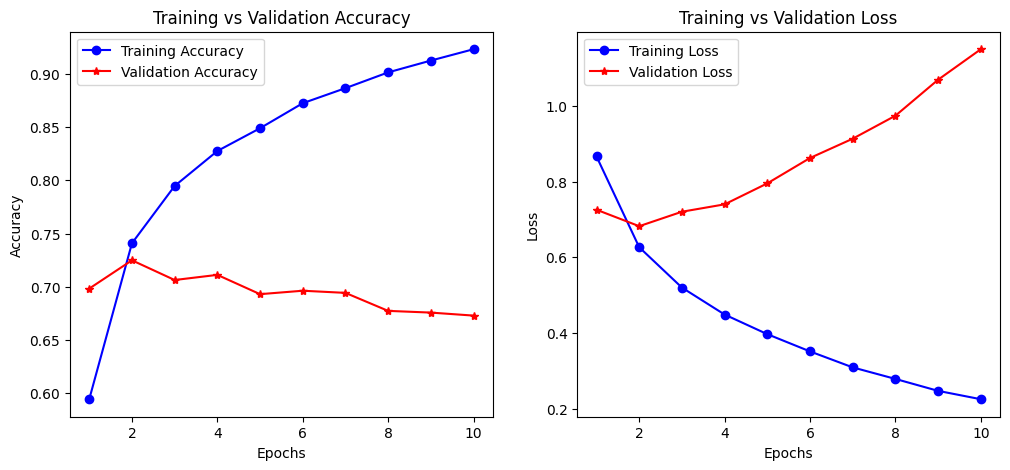

In [67]:
# Extract values from history
epochs = range(1, len(history_gru.history['accuracy']) + 1)
train_acc = history_gru.history['accuracy']
val_acc = history_gru.history['val_accuracy']
train_loss = history_gru.history['loss']
val_loss = history_gru.history['val_loss']

# Plot Accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, train_acc, 'bo-', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r*-', label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(epochs, train_loss, 'bo-', label='Training Loss')
plt.plot(epochs, val_loss, 'r*-', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()

plt.show()

### **Training RNN model**

In [71]:
# Building the RNN Model
model_rnn = Sequential([
    Embedding(max_words,64),
    SimpleRNN(64),
    Dense(3, activation='softmax')
])
# Compiling the RNN Model
model_rnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# Train the RNN model and save the progress in 'history_RNN'
history_RNN = model_rnn.fit(
    X_train,
    y_train,
    epochs=10,
    batch_size=64,
    validation_data=(X_test, y_test)
)

Epoch 1/10
388/388 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - accuracy: 0.4704 - loss: 1.0094 - val_accuracy: 0.6779 - val_loss: 0.7530
Epoch 2/10
388/388 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - accuracy: 0.7653 - loss: 0.5955 - val_accuracy: 0.6577 - val_loss: 0.7841
Epoch 3/10
388/388 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.8828 - loss: 0.3487 - val_accuracy: 0.6469 - val_loss: 0.9300
Epoch 4/10
388/388 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.9447 - loss: 0.1788 - val_accuracy: 0.6315 - val_loss: 1.2043
Epoch 5/10
388/388 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.9677 - loss: 0.1099 - val_accuracy: 0.6160 - val_loss: 1.3910
Epoch 6/10
388/388 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.9807 - loss: 0.0699 - val_accuracy: 0.6249 - val_loss: 1.5228
Epoch 7/10
388/388 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - accuracy: 0.9851 - loss: 0.0518 - val_accuracy: 0.6145 - val_loss: 1.7123
Epoch 8/10
388/388 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - accuracy: 0.9847 - loss: 0.0472 - val_acc

### **RNN Model Evaluation**

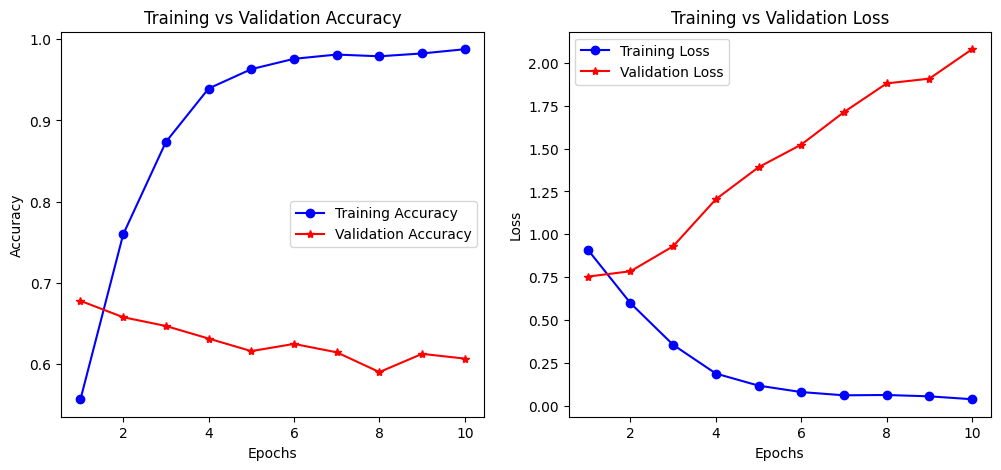

In [72]:
# Extract values from history
epochs = range(1, len(history_RNN.history['accuracy']) + 1)
train_acc = history_RNN.history['accuracy']
val_acc = history_RNN.history['val_accuracy']
train_loss = history_RNN.history['loss']
val_loss = history_RNN.history['val_loss']

# Plot Accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, train_acc, 'bo-', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r*-', label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(epochs, train_loss, 'bo-', label='Training Loss')
plt.plot(epochs, val_loss, 'r*-', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()

plt.show()



In [81]:
print(f"Training accuracy:\t{history_RNN.history['accuracy'][-1]*100:.2f} %")
print(f"Validation accuracy:\t{history_RNN.history['val_accuracy'][-1]*100:.2f} %")

Training accuracy:	98.77 %
Validation accuracy:	60.68 %


### **Model Performance Validation & Accuracy Graph**

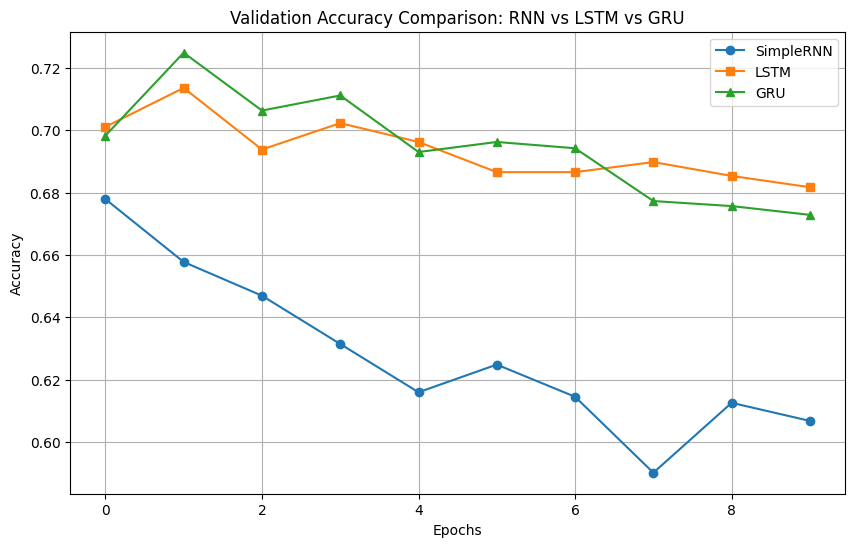

In [73]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Plot Validation Accuracy for each model
plt.plot(history_RNN.history['val_accuracy'], label='SimpleRNN', marker='o')
plt.plot(history_lstm.history['val_accuracy'], label='LSTM', marker='s')
plt.plot(history_gru.history['val_accuracy'], label='GRU', marker='^')

# Add graph metadata
plt.title('Validation Accuracy Comparison: RNN vs LSTM vs GRU')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

### **Prediction/Detection System on Real Time text**

In [91]:
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences

# --- 1. Enhanced Evaluation ---
def evaluate_model(model, name="Model"):
    # Convert to numpy arrays if they are pandas objects to avoid attribute errors
    X_eval = X_test.values if hasattr(X_test, 'values') else X_test
    y_eval = y_test.values if hasattr(y_test, 'values') else y_test
    
    loss, accuracy = model.evaluate(X_eval, y_eval, verbose=0)
    # print(f"\n📊 {name} Performance:")
    # print(f"   - Loss: {loss:.4f}")
    # print(f"   - Accuracy: {accuracy*100:.2f}%")
    # print("-" * 30)

# Evaluate your models
evaluate_model(model_rnn, "SimpleRNN")

# --- 2. Enhanced Prediction Function ---
def predict_sentiment(text, model):
    # a. Preprocess
    text = clean_text(text)
    # b. Vectorize (Ensure 'tokenizer' is the one used during training)
    seq = tokenizer.texts_to_sequences([text])
    # c. Pad (Ensure 'max_len' matches your training config, e.g., 50 or 100)
    padded = pad_sequences(seq, maxlen=max_len)
    
    # d. Predict
    prediction = model.predict(padded, verbose=0)
    pred_idx = np.argmax(prediction, axis=1)[0]
    confidence = np.max(prediction) * 100
    
    # e. Map back to label (Uses LabelEncoder if you created one, otherwise use your dict)
    try:
        label = le.inverse_transform([pred_idx])[0]
    except:
        # Fallback to manual map if LabelEncoder isn't used
        int_map = {0: 'Neutral', 1: 'Negative', 2: 'Positive'}
        label = int_map.get(pred_idx, "Unknown")
        
    return label, confidence

# --- 3. Interactive Loop (Similar to your request) ---
print("\n--- Sentiment Analysis Tool ---")
print("Type 'stop' or 'exit' to quit.")

while True:
    userinput = input("\nEnter text to analyze: ").strip()
    
    if userinput.lower() in ['stop', 'exit', '']:
        print("Exiting tool. Goodbye!")
        break

    # Get prediction and confidence
    label, conf = predict_sentiment(userinput, model_rnn)
    
    # Enhanced Output Formatting
    print(f"Result: {label.upper()} ({conf:.2f}% confidence)")


--- Sentiment Analysis Tool ---
Type 'stop' or 'exit' to quit.



Enter text to analyze:  he is good


Result: POSITIVE (98.34% confidence)



Enter text to analyze:  he is bad


Result: NEGATIVE (66.32% confidence)



Enter text to analyze:  the food is not okay but drink is fine


Result: NEUTRAL (95.32% confidence)



Enter text to analyze:  stop


Exiting tool. Goodbye!


In [94]:
# Saves architecture, weights & optimizer
model_rnn.save("rnn_model.h5")  


import pickle

with open("tokenizer.pkl", "wb") as f:
    pickle.dump(tokenizer, f)

In [96]:
print(tf.__version__)

2.19.0
